<a href="https://colab.research.google.com/github/shrikantk-4589/Used-Car-Price-Estimator/blob/main/Used_cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/EDA/used_cars.csv')

In [4]:
df.shape

(99187, 11)

In [5]:
df.head()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,VW
1,1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,VW
2,2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,VW
3,3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,VW
4,4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,VW


In [6]:
df.tail()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
99182,10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,Audi
99183,10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,Audi
99184,10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,Audi
99185,10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,Audi
99186,10667,Q3,2016,15999,Manual,11855,Petrol,150,47.9,1.4,Audi


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99187 non-null  int64  
 1   model         99187 non-null  object 
 2   year          99187 non-null  int64  
 3   price         99187 non-null  int64  
 4   transmission  99187 non-null  object 
 5   mileage       99187 non-null  int64  
 6   fuelType      99187 non-null  object 
 7   tax           99187 non-null  int64  
 8   mpg           99187 non-null  float64
 9   engineSize    99187 non-null  float64
 10  Make          99187 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.3+ MB


In [8]:
df.describe()

,Unnamed: 0,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,6294.413532,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,4265.588536,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,0.000000,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2755.000000,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,5591.000000,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,9420.000000,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,17964.000000,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [9]:
df.isnull().sum()

Unnamed: 0      0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [10]:
df.duplicated().sum()

0

#EDA

<ipython-input-11-5c8f829a8034>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')


<Axes: >

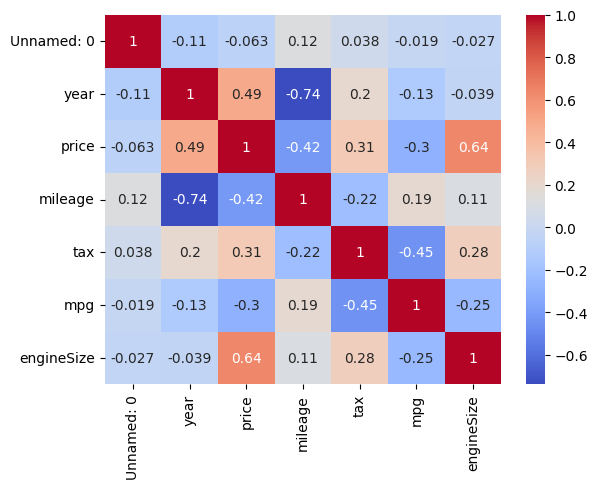

In [11]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

In [12]:
df = df.drop('Unnamed: 0', axis = 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   Make          99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.6+ MB


#univariate Analysis
1. mileage, tax, engine size

<Axes: xlabel='engineSize', ylabel='Count'>

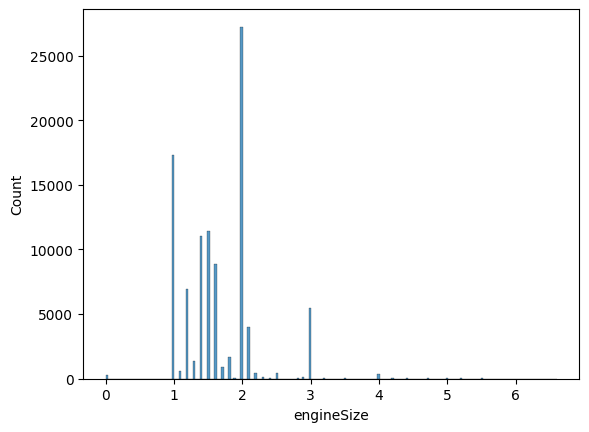

In [27]:
sns.histplot(data = df, x = 'engineSize')

<Axes: xlabel='year'>

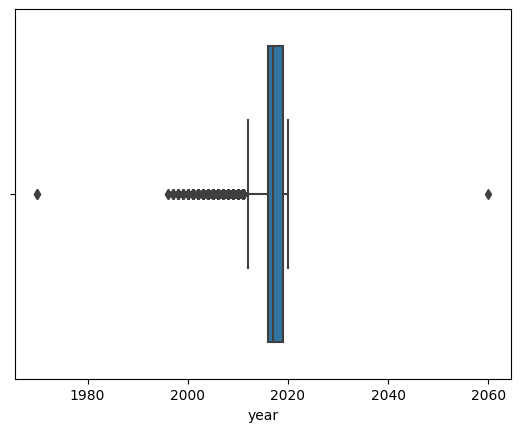

In [15]:
sns.boxplot(x = 'year', data = df)

transmission, fuel type, make

<Axes: xlabel='fuelType', ylabel='Count'>

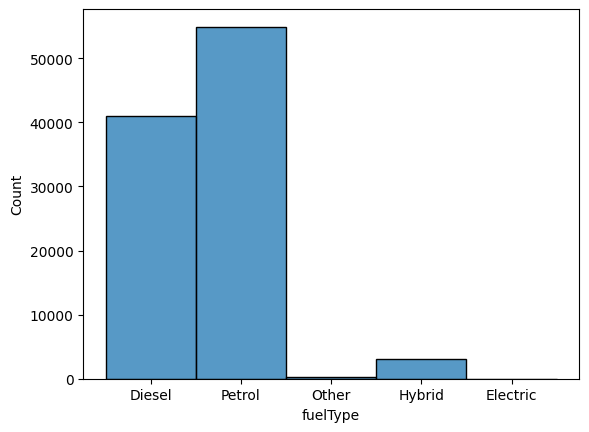

In [28]:
sns.histplot(data = df, x = 'fuelType')

<Axes: xlabel='transmission', ylabel='Count'>

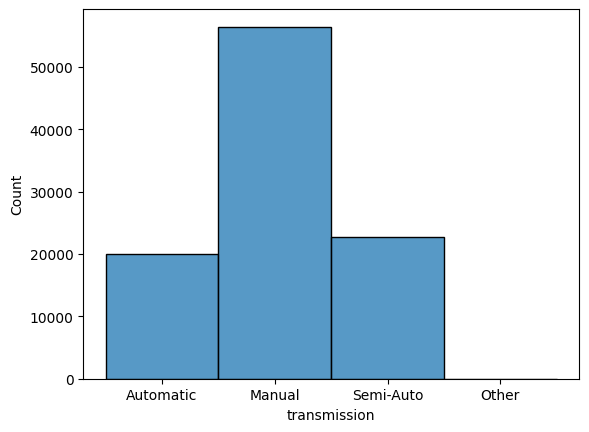

In [29]:
sns.histplot(data = df, x = 'transmission')

<Axes: xlabel='Make', ylabel='Count'>

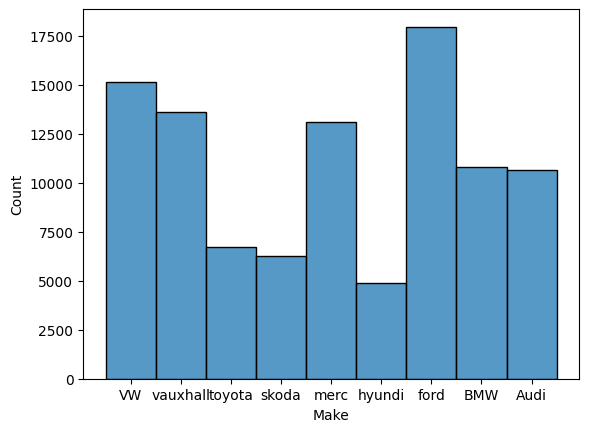

In [31]:
sns.histplot(data = df, x = 'Make')

In [16]:
# wrong outlier possibly

df[df['year'] == 2060]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
77499,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4,ford


<Axes: xlabel='mpg'>

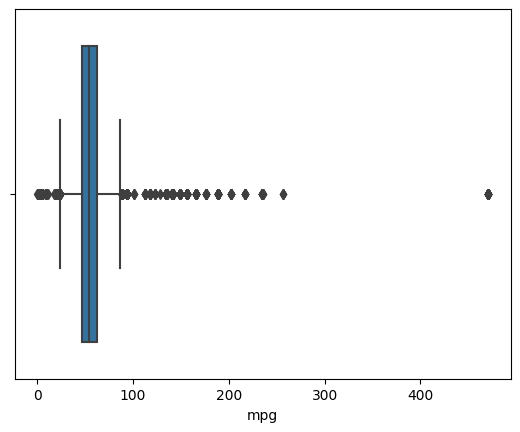

In [18]:
sns.boxplot(x = 'mpg', data = df)

# Bivariate Analysis

mileage vs. price, engine size vs. price